In [1]:
#import umap
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import Counter
import random
import colorsys

### Import the data and load it in a dataframe of pandas 

In [2]:
df = pd.read_excel('Areas y población Mun_COL 2005_2017.xlsx').iloc[:-1,:]

In [3]:
df.head()

,DP,DPNOM,DPMP,MPIO,POBLACIÓN TOTAL 2005,POBLACIÓN CABECERA 2005,POBLACIÓN RESTO 2005,POBLACIÓN TOTAL 2017,POBLACIÓN CABECERA 2017,POBLACIÓN RESTO 2017,AREA EN KM2 CABECERA 2005,AREA EN KM2 CENTRO POBLADO 2005,AREA EN KM 2 RESTO 2005,AREA EN KM2 CABECERA 2017,AREA EN KM2 CENTRO POBLADO 2017,AREA EN KM 2 RESTO 2017
0,5,Antioquia,5001,Medellín,2214494,2175681,38813,2508452,2479990,28462,112.599136,3.333152,256.106044,109.980043,14.609643,242.850543
1,5,Antioquia,5002,Abejorral,20249,6271,13978,19096,6765,12331,1.153995,0.144522,505.945056,1.236794,0.106953,505.790367
2,5,Antioquia,5004,Abriaquí,2690,858,1832,2019,724,1295,0.531890,0.000000,287.578156,0.156826,0.029510,296.769644
3,5,Antioquia,5021,Alejandría,3816,1896,1920,3393,1804,1589,0.371011,0.000000,126.738351,0.399738,0.000000,128.532415
4,5,Antioquia,5030,Amagá,27155,14070,13085,29980,17174,12806,2.801529,0.130832,80.214944,1.509397,1.828286,80.794794


In [8]:
df.describe()

,DP,DPMP,POBLACIÓN TOTAL 2005,POBLACIÓN CABECERA 2005,POBLACIÓN RESTO 2005,POBLACIÓN TOTAL 2017,POBLACIÓN CABECERA 2017,POBLACIÓN RESTO 2017,AREA EN KM2 CABECERA 2005,AREA EN KM2 CENTRO POBLADO 2005,AREA EN KM 2 RESTO 2005,AREA EN KM2 CABECERA 2017,AREA EN KM2 CENTRO POBLADO 2017,AREA EN KM 2 RESTO 2017
count,1122.000000,1122.000000,1.122000e+03,1.122000e+03,1122.000000,1.122000e+03,1.122000e+03,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000
mean,38.282531,38716.410873,3.822513e+04,2.842184e+04,9803.291444,4.393192e+04,3.370415e+04,10227.770053,3.085113,0.456685,1013.052786,4.879983,0.915556,850.764482
std,26.588271,26574.905059,2.329032e+05,2.312218e+05,9926.745333,2.732377e+05,2.715673e+05,11762.363632,14.264436,1.105590,3211.782856,45.361030,1.756232,2937.666290
min,5.000000,5001.000000,0.000000e+00,0.000000e+00,0.000000,3.920000e+02,0.000000e+00,172.000000,0.000000,0.000000,0.000000,0.041805,0.000000,0.000000
25%,15.000000,15677.250000,6.817750e+03,1.693500e+03,4014.250000,6.697250e+03,1.911250e+03,3663.250000,0.306696,0.000000,127.820304,0.407813,0.050280,121.297972
50%,25.000000,25840.000000,1.251500e+04,4.158000e+03,7019.500000,1.357050e+04,5.013000e+03,6739.000000,0.697962,0.098596,280.058571,0.901225,0.310458,264.993219
75%,66.000000,66543.000000,2.384975e+04,1.079150e+04,12256.750000,2.685875e+04,1.319200e+04,12840.500000,1.805689,0.411744,706.791479,2.331975,0.965454,619.197173
max,99.000000,99773.000000,6.840116e+06,6.824507e+06,109982.000000,8.080734e+06,8.063991e+06,173143.000000,380.743770,14.012152,65560.804906,1432.794977,18.141420,65594.340099


### Make clustering with k means

Initially we will test using three clusters using different initial centroids so we can see if a three cluster system is actually a valid classification.

In [4]:
from sklearn.cluster import KMeans

In [9]:
df.columns

Index(['DP', 'DPNOM', 'DPMP', 'MPIO', 'POBLACIÓN TOTAL 2005',
       'POBLACIÓN CABECERA 2005', 'POBLACIÓN RESTO 2005',
       'POBLACIÓN TOTAL 2017', 'POBLACIÓN CABECERA 2017',
       'POBLACIÓN RESTO 2017', 'AREA EN KM2 CABECERA 2005',
       'AREA EN KM2 CENTRO POBLADO 2005', 'AREA EN KM 2 RESTO 2005',
       'AREA EN KM2 CABECERA 2017', 'AREA EN KM2 CENTRO POBLADO 2017',
       'AREA EN KM 2 RESTO 2017'],
      dtype='object')

In [19]:
df_2=df.drop(['DP','DPNOM','DPMP','MPIO'],1)

In [21]:
Data_To_Clasify=df_2.values

In [22]:
Data_To_Clasify.shape

(1122, 12)

In [30]:
kmeans = KMeans(n_clusters=2, random_state=0,).fit(Data_To_Clasify)

In [35]:
kmeans.labels_.shape

(1122,)

In [37]:
np.amax(kmeans.labels_)

1

Visualize the data using dimensionality reduction by PCA

In [38]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [39]:
reduced_data = PCA(n_components=2).fit_transform(Data_To_Clasify)

In [41]:
reduced_data.shape

(1122, 2)

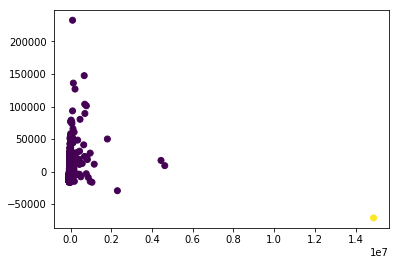

In [44]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_)